In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# GRU定義

class GRUNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size):
    super(GRUNet, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers

    # GRU レイヤー
    self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)

    # 全レイヤー
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    # 隠れ状態を0で初期化
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

    # 前方伝播GNU
    out, _ = self.gru(x, h0)

    # 最終時の隠れ状態をデコード
    out = self.fc(out[:, -1, :])
    return out

In [3]:
# パラメータ
input_size = 1
hidden_size = 16
num_layers = 2
output_size = 1

model = GRUNet(input_size, hidden_size, num_layers, output_size)

# サンプル時系列データの生成(Sin関数)
t = np.linspace(0, 10, 100)
data = np.sin(t)

# データの整形とテンソルへの変換
# データは(batch_size, seq_length, input_size)の形
seq_length = 10
data = [data[i:i+seq_length] for i in range(len(data)-seq_length)]
data = torch.tensor(data, dtype=torch.float32).unsqueeze(-1)  # input_size=1より次元追加

model.eval()
with torch.no_grad():
  output = model(data)

/tmp/ipykernel_1703402/1273249197.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  data = torch.tensor(data, dtype=torch.float32).unsqueeze(-1)  # input_size=1より次元追加


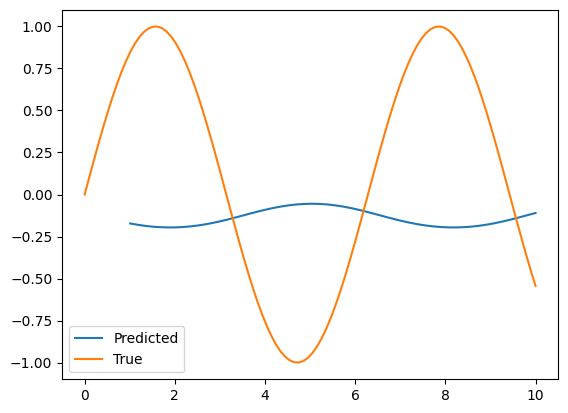

In [4]:
plt.plot(t[seq_length:], output.numpy(), label='Predicted')
plt.plot(t, np.sin(t), label='True')
plt.legend()
plt.show()